In [6]:
import pandas as pd, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import mlflow
import mlflow.tensorflow


In [7]:
df = pd.read_csv("Resultados_Saber11_2018.csv")
df["ACCESO_U"] = (df["PUNT_GLOBAL"] >= 250).astype(int)


In [8]:
print(df.columns.tolist())


['ESTU_FECHANACIMIENTO', 'PUNT_MATEMATICAS', 'PUNT_LECTURA_CRITICA', 'PUNT_C_NATURALES', 'PUNT_SOCIALES_CIUDADANAS', 'PUNT_INGLES', 'PUNT_GLOBAL', 'AÑO_NACIMIENTO', 'EDAD', 'ESTU_GENERO_M', 'COLE_AREA_UBICACION_URBANO', 'COLE_CARACTER_NO APLICA', 'COLE_CARACTER_TÉCNICO', 'COLE_CARACTER_TÉCNICO/ACADÉMICO', 'COLE_JORNADA_MAÑANA', 'COLE_JORNADA_NOCHE', 'COLE_JORNADA_SABATINA', 'COLE_JORNADA_TARDE', 'COLE_JORNADA_UNICA', 'ESTU_DEPTO_RESIDE_ARAUCA', 'ESTU_DEPTO_RESIDE_ATLANTICO', 'ESTU_DEPTO_RESIDE_BOGOTÁ', 'ESTU_DEPTO_RESIDE_BOLIVAR', 'ESTU_DEPTO_RESIDE_BOYACA', 'ESTU_DEPTO_RESIDE_CALDAS', 'ESTU_DEPTO_RESIDE_CAQUETA', 'ESTU_DEPTO_RESIDE_CASANARE', 'ESTU_DEPTO_RESIDE_CAUCA', 'ESTU_DEPTO_RESIDE_CESAR', 'ESTU_DEPTO_RESIDE_CHOCO', 'ESTU_DEPTO_RESIDE_CORDOBA', 'ESTU_DEPTO_RESIDE_CUNDINAMARCA', 'ESTU_DEPTO_RESIDE_GUAINIA', 'ESTU_DEPTO_RESIDE_GUAVIARE', 'ESTU_DEPTO_RESIDE_HUILA', 'ESTU_DEPTO_RESIDE_LA GUAJIRA', 'ESTU_DEPTO_RESIDE_MAGDALENA', 'ESTU_DEPTO_RESIDE_META', 'ESTU_DEPTO_RESIDE_NARIÑO', '

In [9]:
variables_modelo = [
    "EDAD", "ESTU_GENERO_M",
    "COLE_AREA_UBICACION_URBANO",
    "COLE_CARACTER_TÉCNICO", "COLE_CARACTER_TÉCNICO/ACADÉMICO",
    "COLE_JORNADA_MAÑANA", "COLE_JORNADA_TARDE", "COLE_JORNADA_UNICA",
    "ESTU_DEPTO_RESIDE_BOGOTÁ", "ESTU_DEPTO_RESIDE_BOLIVAR",
    "ESTU_DEPTO_RESIDE_CUNDINAMARCA", "ESTU_DEPTO_RESIDE_VALLE"
]


X = df[variables_modelo].copy()
y = df["ACCESO_U"]


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

smote = SMOTE(random_state=42)
X_bal, y_bal = smote.fit_resample(X_scaled, y)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.3, random_state=42)


In [12]:
mlflow.tensorflow.autolog()
mlflow.set_experiment("Clasificación_Acceso_U")


<Experiment: artifact_location='file:///c:/Users/gordi/Downloads/mlruns/873363215172189864', creation_time=1748204547396, experiment_id='873363215172189864', last_update_time=1748204547396, lifecycle_stage='active', name='Clasificación_Acceso_U', tags={}>

In [13]:
with mlflow.start_run():
    model = Sequential([
        Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])


c:\Users\gordi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC()])

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train,
                        validation_split=0.2,
                        epochs=50,
                        batch_size=32,
                        callbacks=[early_stop],
                        verbose=1)


2025/05/25 15:34:27 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '2c15d464dd2f4083b8f9b0cac604bde5', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2025/05/25 15:34:27 WARNING mlflow.tensorflow: Failed to log training dataset information to MLflow Tracking. Reason: 'Series' object has no attribute 'flatten'


Epoch 1/50
845/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6388 - auc: 0.6919 - loss: 0.6317 - precision: 0.6315 - recall: 0.6544

852/852 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6391 - auc: 0.6923 - loss: 0.6314 - precision: 0.6317 - recall: 0.6548 - val_accuracy: 0.6975 - val_auc: 0.7571 - val_loss: 0.5845 - val_precision: 0.6894 - val_recall: 0.7336
Epoch 2/50
849/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6903 - auc: 0.7591 - loss: 0.5798 - precision: 0.6740 - recall: 0.7378

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6903 - auc: 0.7591 - loss: 0.5798 - precision: 0.6740 - recall: 0.7378 - val_accuracy: 0.6950 - val_auc: 0.7621 - val_loss: 0.5797 - val_precision: 0.6773 - val_recall: 0.7605
Epoch 3/50
843/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6891 - auc: 0.7650 - loss: 0.5743 - precision: 0.6734 - recall: 0.7211

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6891 - auc: 0.7650 - loss: 0.5743 - precision: 0.6735 - recall: 0.7211 - val_accuracy: 0.6994 - val_auc: 0.7646 - val_loss: 0.5750 - val_precision: 0.6899 - val_recall: 0.7391
Epoch 4/50
846/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6937 - auc: 0.7690 - loss: 0.5692 - precision: 0.6818 - recall: 0.7192

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6937 - auc: 0.7689 - loss: 0.5692 - precision: 0.6818 - recall: 0.7192 - val_accuracy: 0.6991 - val_auc: 0.7653 - val_loss: 0.5744 - val_precision: 0.6930 - val_recall: 0.7295
Epoch 5/50
840/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6957 - auc: 0.7677 - loss: 0.5699 - precision: 0.6830 - recall: 0.7239

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6957 - auc: 0.7677 - loss: 0.5700 - precision: 0.6829 - recall: 0.7241 - val_accuracy: 0.6990 - val_auc: 0.7671 - val_loss: 0.5736 - val_precision: 0.6991 - val_recall: 0.7127
Epoch 6/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6931 - auc: 0.7654 - loss: 0.5732 - precision: 0.6804 - recall: 0.7231 - val_accuracy: 0.7012 - val_auc: 0.7674 - val_loss: 0.5751 - val_precision: 0.6997 - val_recall: 0.7188
Epoch 7/50
851/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6945 - auc: 0.7697 - loss: 0.5684 - precision: 0.6824 - recall: 0.7263

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6945 - auc: 0.7697 - loss: 0.5684 - precision: 0.6824 - recall: 0.7263 - val_accuracy: 0.7023 - val_auc: 0.7681 - val_loss: 0.5716 - val_precision: 0.6976 - val_recall: 0.7284
Epoch 8/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6984 - auc: 0.7691 - loss: 0.5687 - precision: 0.6822 - recall: 0.7311

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6984 - auc: 0.7691 - loss: 0.5687 - precision: 0.6822 - recall: 0.7311 - val_accuracy: 0.7038 - val_auc: 0.7699 - val_loss: 0.5700 - val_precision: 0.7003 - val_recall: 0.7266
Epoch 9/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6892 - auc: 0.7656 - loss: 0.5713 - precision: 0.6780 - recall: 0.7227 - val_accuracy: 0.7047 - val_auc: 0.7689 - val_loss: 0.5712 - val_precision: 0.7009 - val_recall: 0.7281
Epoch 10/50
840/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6936 - auc: 0.7705 - loss: 0.5671 - precision: 0.6766 - recall: 0.7330

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6936 - auc: 0.7705 - loss: 0.5671 - precision: 0.6767 - recall: 0.7329 - val_accuracy: 0.7039 - val_auc: 0.7714 - val_loss: 0.5684 - val_precision: 0.7049 - val_recall: 0.7153
Epoch 11/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6980 - auc: 0.7758 - loss: 0.5619 - precision: 0.6828 - recall: 0.7328 - val_accuracy: 0.7003 - val_auc: 0.7693 - val_loss: 0.5704 - val_precision: 0.7015 - val_recall: 0.7113
Epoch 12/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6990 - auc: 0.7719 - loss: 0.5665 - precision: 0.6855 - recall: 0.7333 - val_accuracy: 0.7019 - val_auc: 0.7718 - val_loss: 0.5687 - val_precision: 0.7089 - val_recall: 0.6988
Epoch 13/50
845/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6947 - auc: 0.7704 - loss: 0.5673 - precision: 0.6831 - recall: 0.7277

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6947 - auc: 0.7705 - loss: 0.5673 - precision: 0.6831 - recall: 0.7277 - val_accuracy: 0.7044 - val_auc: 0.7713 - val_loss: 0.5670 - val_precision: 0.6845 - val_recall: 0.7730
Epoch 14/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6923 - auc: 0.7665 - loss: 0.5704 - precision: 0.6789 - recall: 0.7348 - val_accuracy: 0.7048 - val_auc: 0.7720 - val_loss: 0.5677 - val_precision: 0.7069 - val_recall: 0.7133
Epoch 15/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6943 - auc: 0.7684 - loss: 0.5687 - precision: 0.6794 - recall: 0.7334 - val_accuracy: 0.7037 - val_auc: 0.7697 - val_loss: 0.5687 - val_precision: 0.6998 - val_recall: 0.7272
Epoch 16/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6958 - auc: 0.7741 - loss: 0.5626 - precision: 0.6831 - recall: 0.7337 - val_accuracy: 0.7053 - val_auc: 0.7712 - val_loss: 0.5675 - val_precision: 0.6915 - val_recall: 0.7556
Epoch 17/50
841/852 ━━━━━━━━━━━━━━━━━━━━

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6971 - auc: 0.7748 - loss: 0.5625 - precision: 0.6806 - recall: 0.7363 - val_accuracy: 0.7042 - val_auc: 0.7722 - val_loss: 0.5661 - val_precision: 0.6864 - val_recall: 0.7669
Epoch 18/50
846/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7057 - auc: 0.7799 - loss: 0.5581 - precision: 0.6913 - recall: 0.7311

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7056 - auc: 0.7798 - loss: 0.5581 - precision: 0.6912 - recall: 0.7311 - val_accuracy: 0.7016 - val_auc: 0.7740 - val_loss: 0.5658 - val_precision: 0.7101 - val_recall: 0.6950
Epoch 19/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6976 - auc: 0.7730 - loss: 0.5648 - precision: 0.6863 - recall: 0.7271 - val_accuracy: 0.7028 - val_auc: 0.7722 - val_loss: 0.5658 - val_precision: 0.6928 - val_recall: 0.7431
Epoch 20/50
847/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6965 - auc: 0.7726 - loss: 0.5633 - precision: 0.6857 - recall: 0.7305

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6965 - auc: 0.7727 - loss: 0.5633 - precision: 0.6857 - recall: 0.7304 - val_accuracy: 0.7044 - val_auc: 0.7731 - val_loss: 0.5653 - val_precision: 0.6993 - val_recall: 0.7312
Epoch 21/50
848/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6999 - auc: 0.7759 - loss: 0.5608 - precision: 0.6892 - recall: 0.7241

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6998 - auc: 0.7758 - loss: 0.5608 - precision: 0.6892 - recall: 0.7241 - val_accuracy: 0.7051 - val_auc: 0.7740 - val_loss: 0.5647 - val_precision: 0.6984 - val_recall: 0.7362
Epoch 22/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6996 - auc: 0.7750 - loss: 0.5624 - precision: 0.6871 - recall: 0.7362 - val_accuracy: 0.7007 - val_auc: 0.7698 - val_loss: 0.5693 - val_precision: 0.6984 - val_recall: 0.7208
Epoch 23/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7002 - auc: 0.7739 - loss: 0.5625 - precision: 0.6872 - recall: 0.7280

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7002 - auc: 0.7739 - loss: 0.5625 - precision: 0.6872 - recall: 0.7280 - val_accuracy: 0.7034 - val_auc: 0.7732 - val_loss: 0.5645 - val_precision: 0.7013 - val_recall: 0.7223
Epoch 24/50
843/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7002 - auc: 0.7741 - loss: 0.5633 - precision: 0.6880 - recall: 0.7256

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7002 - auc: 0.7741 - loss: 0.5633 - precision: 0.6880 - recall: 0.7256 - val_accuracy: 0.7045 - val_auc: 0.7744 - val_loss: 0.5639 - val_precision: 0.7022 - val_recall: 0.7240
Epoch 25/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6964 - auc: 0.7745 - loss: 0.5620 - precision: 0.6805 - recall: 0.7302 - val_accuracy: 0.7044 - val_auc: 0.7731 - val_loss: 0.5653 - val_precision: 0.7005 - val_recall: 0.7281
Epoch 26/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6957 - auc: 0.7746 - loss: 0.5614 - precision: 0.6814 - recall: 0.7287 - val_accuracy: 0.7048 - val_auc: 0.7740 - val_loss: 0.5651 - val_precision: 0.7047 - val_recall: 0.7188
Epoch 27/50
836/852 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6954 - auc: 0.7713 - loss: 0.5651 - precision: 0.6834 - recall: 0.7214

852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6955 - auc: 0.7713 - loss: 0.5651 - precision: 0.6834 - recall: 0.7216 - val_accuracy: 0.7041 - val_auc: 0.7750 - val_loss: 0.5634 - val_precision: 0.6930 - val_recall: 0.7472
Epoch 28/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6965 - auc: 0.7676 - loss: 0.5683 - precision: 0.6833 - recall: 0.7428 - val_accuracy: 0.6969 - val_auc: 0.7721 - val_loss: 0.5676 - val_precision: 0.6927 - val_recall: 0.7226
Epoch 29/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6973 - auc: 0.7745 - loss: 0.5628 - precision: 0.6839 - recall: 0.7252 - val_accuracy: 0.7038 - val_auc: 0.7727 - val_loss: 0.5646 - val_precision: 0.6989 - val_recall: 0.7301
Epoch 30/50
852/852 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6948 - auc: 0.7694 - loss: 0.5668 - precision: 0.6794 - recall: 0.7216 - val_accuracy: 0.7047 - val_auc: 0.7724 - val_loss: 0.5654 - val_precision: 0.6905 - val_recall: 0.7564
Epoch 31/50
852/852 ━━━━━━━━━━━━━━━━━━━━

In [15]:
y_pred_probs = model.predict(X_test).flatten()
y_pred = (y_pred_probs > 0.5).astype(int)

print("\n--- Reporte de clasificación ---")
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_pred_probs))

457/457 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step

--- Reporte de clasificación ---
              precision    recall  f1-score   support

           0       0.71      0.66      0.69      7295
           1       0.68      0.74      0.71      7304

    accuracy                           0.70     14599
   macro avg       0.70      0.70      0.70     14599
weighted avg       0.70      0.70      0.70     14599

AUC: 0.7676010759969281


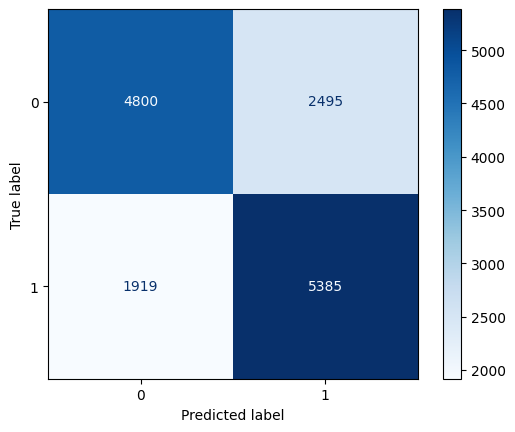

In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


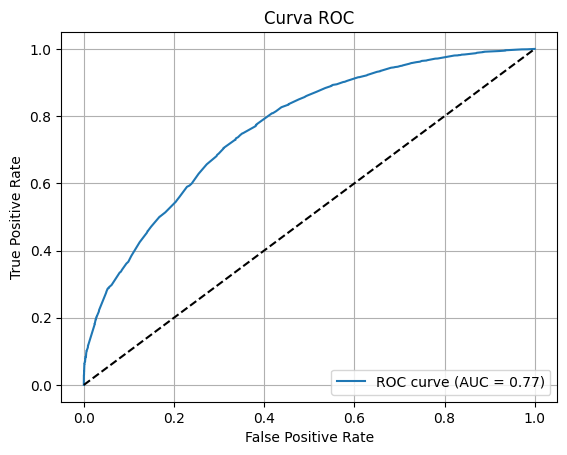

In [17]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curva ROC")
plt.legend(loc="lower right")
plt.grid()
plt.show()


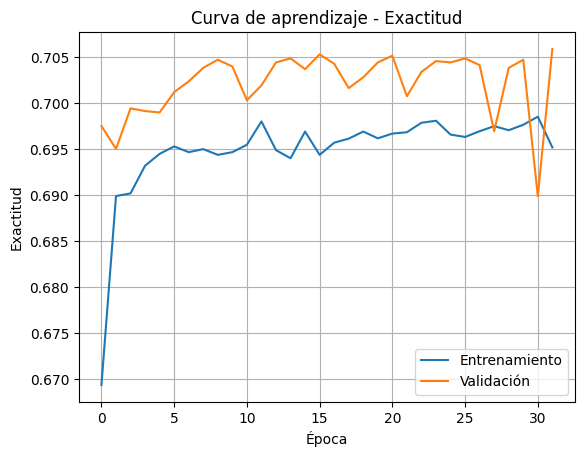

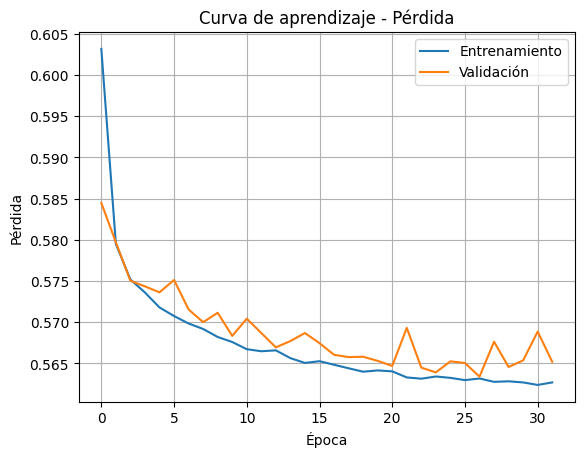

In [18]:
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Exactitud')
plt.title('Curva de aprendizaje - Exactitud')
plt.legend()
plt.grid()
plt.show()

plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Curva de aprendizaje - Pérdida')
plt.legend()
plt.grid()
plt.show()
